In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model, load_model, Sequential, save_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
seed = np.random.seed(7)

##Task 01

In [337]:
task11_dt=pd.read_csv('/content/housing.csv')

In [338]:
task11_dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [339]:
task11_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
task11_dt.shape

(20640, 10)

In [340]:
task11_dt.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Removing null values from the data

In [341]:
task11_dt.dropna(inplace=True)

Trying to identify the relationship and variation of target column 'median_house_value' with the categorical column 'ocean_proximity'.

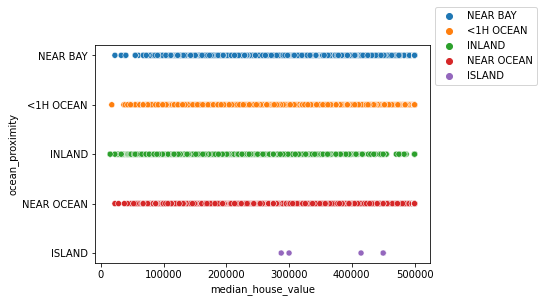

In [342]:
sns.scatterplot(data=task11_dt,x='median_house_value',y='ocean_proximity',hue='ocean_proximity')
plt.legend(loc='best', bbox_to_anchor=(1, 1, 0.2, 0.2))
plt.show()

From the above plot it is clear that median_house_value is independent of the column ocean_proximity so it can be dropped.

In [343]:
task11_dt=task11_dt.drop(labels='ocean_proximity', axis=1)


In [344]:
task11_dt.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [345]:
task11_dt.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Identifying the correlation of between other numeric columns in the data.

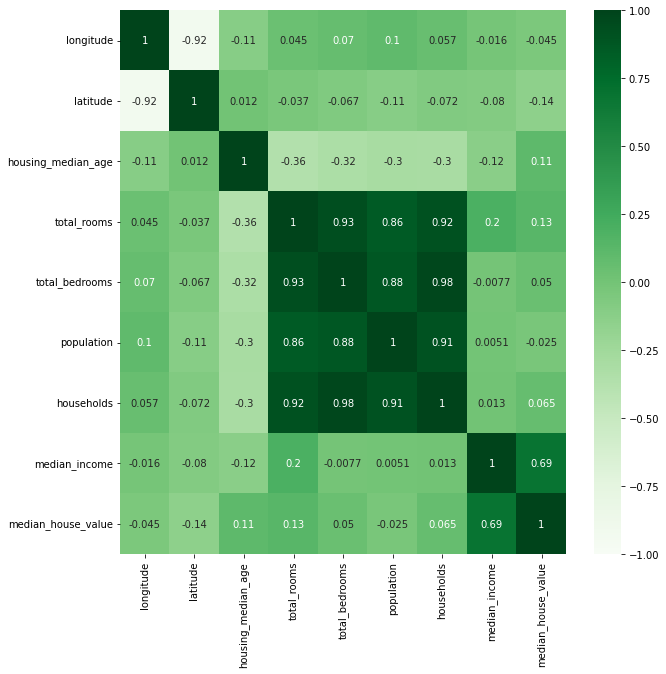

In [346]:
plt.figure(figsize=(10,10))
sns.heatmap(data=task11_dt.corr(), vmin=-1, vmax=1,fmt='.2g',annot=True,cmap='Greens')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


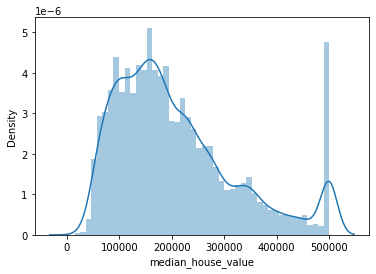

In [347]:
sns.distplot(task11_dt['median_house_value'])
plt.show()

####Splitting the data in 70:30 ratio for training and testing of the model.

In [348]:
X = task11_dt.drop('median_house_value',axis=1)
y = task11_dt['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

####Normalizing data

In [349]:

X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()


####Model Building training and Evaluation

In [350]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
tf.random.set_seed(4)
model = Sequential()
model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
model.compile(optimizer='adam', loss='mse',)

In [351]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_133 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 17        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [352]:

model.fit(x=X_train,y=y_train.values,
          validation_split=0.1,
          batch_size=100,epochs=400)

Epoch 1/400
129/129 [==============================] - 1s 2ms/step - loss: 56885026816.0000 - val_loss: 55384571904.0000
Epoch 2/400
129/129 [==============================] - 0s 2ms/step - loss: 56881270784.0000 - val_loss: 55377022976.0000
Epoch 3/400
129/129 [==============================] - 0s 2ms/step - loss: 56866533376.0000 - val_loss: 55353315328.0000
Epoch 4/400
129/129 [==============================] - 0s 2ms/step - loss: 56830369792.0000 - val_loss: 55303634944.0000
Epoch 5/400
129/129 [==============================] - 0s 2ms/step - loss: 56764387328.0000 - val_loss: 55221104640.0000
Epoch 6/400
129/129 [==============================] - 0s 2ms/step - loss: 56661778432.0000 - val_loss: 55099146240.0000
Epoch 7/400
129/129 [==============================] - 0s 2ms/step - loss: 56517169152.0000 - val_loss: 54933295104.0000
Epoch 8/400
129/129 [==============================] - 0s 2ms/step - loss: 56326115328.0000 - val_loss: 54719307776.0000
Epoch 9/400
129/129 [===========

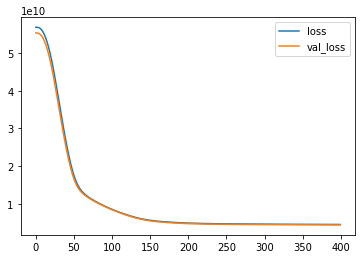

In [353]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [354]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)
print("Mean squared error :",np.sqrt(mean_squared_error(y_test,predictions)))


Mean squared error : 66232.48783935174


##Task 02

In [355]:
task2_dt=pd.read_csv('/content/Electric_Production.csv',)

task2_dt.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [239]:
task2_dt.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

**Since ONE prediction value (1 output neuron) so 1 target per sample.**
**Creating a function to convert the data such that required number of previous records are used as the features for single current record as target.**

In [356]:
def new_feature_dataset(ip_data, prev_data_count=2):
    new_data=[]
    n=ip_data.shape[0]
    i_range = n - prev_data_count - 1
    
    for i in range(0, i_range):
        new_data.append(ip_data[i:(i+prev_data_count+1)]) 
        #Add the records upto the previous count value as features and current record as target
    return np.array(new_data)

**Here, considering 6 previous records as appropriate no of features for prediction of single current record as target.**

In [357]:
prev_data_count=6
#no of previous occuring recors to be used as features 
new_task2_data = new_feature_dataset(task2_dt['IPG2211A2N'],prev_data_count)

In [358]:
col_names=['feature_'+str(i+1) for i in range(0,prev_data_count)]
col_names.append('Target')
print(col_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'Target']


In [359]:
new_task2_data=pd.DataFrame(new_task2_data,columns=col_names)
new_task2_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,Target
0,72.5052,70.6720,62.4502,57.4714,55.3151,58.0904,62.6202
1,70.6720,62.4502,57.4714,55.3151,58.0904,62.6202,63.2485
2,62.4502,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846
3,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846,56.3154
4,55.3151,58.0904,62.6202,63.2485,60.5846,56.3154,58.0005


In [360]:
new_task2_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,Target
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,88.506588,88.608251,88.706352,88.799083,88.891756,88.999501,89.144708
std,15.233457,15.258674,15.266048,15.215907,15.134459,15.044113,15.018289
min,55.315100,55.315100,55.315100,55.315100,55.315100,55.813700,55.813700
25%,76.699975,76.840375,77.122050,77.184800,77.291725,77.504050,77.520400
50%,89.580550,89.680250,89.751400,89.768100,89.900850,90.046000,90.178250
75%,100.363525,100.433250,100.502950,100.502950,100.502950,100.502950,100.652875
max,124.254900,124.254900,124.254900,124.254900,124.254900,124.254900,124.254900


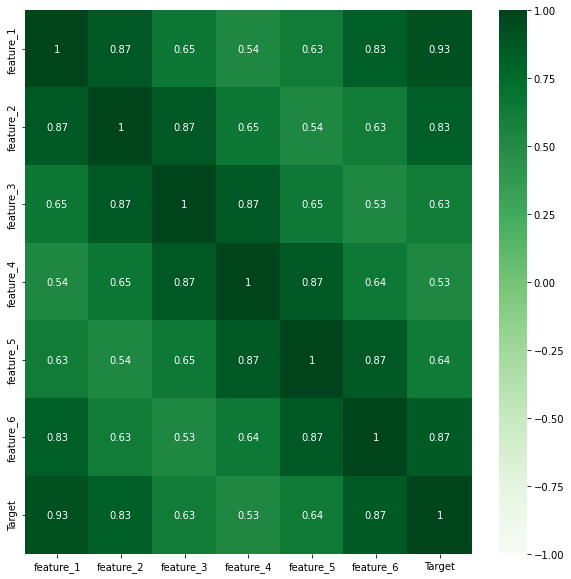

In [361]:
plt.figure(figsize=(10,10))
sns.heatmap(data=new_task2_data.corr(), vmin=-1, vmax=1,fmt='.2g',annot=True,cmap='Greens')
plt.show()

It is very clear that feature_1, feature_2, feature_6 have very high correlation of current Target.

In [362]:
X = new_task2_data.drop('Target',axis=1)
y = new_task2_data['Target']


####Splitting the data in 80:20 ratio for training and testing of the model.

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [364]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
180,102.2301,94.2989,88.0927,81.4425,84.4552,91.0406
3,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846
243,86.4776,87.2234,99.5076,108.3501,109.4862,99.1155
258,110.9503,111.5192,95.7632,90.3738,92.3566,103.0660
303,86.3000,90.8364,104.3538,112.8066,112.9014,100.1209


In [365]:
y_train.head()

180     95.9957
3       56.3154
243     89.7567
258    112.0576
303     88.9251
Name: Target, dtype: float64

####Normalizing data

In [366]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()


####Model Building training and Evaluation

In [367]:
tf.random.set_seed(4)
model2 = Sequential()
model2.add(Dense(6,activation='relu',input_dim=6))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(6,activation='relu'))
model2.add(Dense(1,activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
model2.compile(optimizer='adam', loss='mse',)

In [368]:
model2.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_136 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_137 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [369]:

model2.fit(x=X_train,y=y_train.values,
          validation_split=0.1,
          batch_size=100,epochs=400)

Epoch 1/400
3/3 [==============================] - 1s 67ms/step - loss: 8164.5430 - val_loss: 7958.6963
Epoch 2/400
3/3 [==============================] - 0s 11ms/step - loss: 8157.3750 - val_loss: 7950.9438
Epoch 3/400
3/3 [==============================] - 0s 11ms/step - loss: 8150.0703 - val_loss: 7942.9180
Epoch 4/400
3/3 [==============================] - 0s 11ms/step - loss: 8142.5962 - val_loss: 7934.6621
Epoch 5/400
3/3 [==============================] - 0s 10ms/step - loss: 8134.9097 - val_loss: 7926.2344
Epoch 6/400
3/3 [==============================] - 0s 10ms/step - loss: 8127.1821 - val_loss: 7917.6865
Epoch 7/400
3/3 [==============================] - 0s 10ms/step - loss: 8119.2222 - val_loss: 7908.8838
Epoch 8/400
3/3 [==============================] - 0s 12ms/step - loss: 8110.9590 - val_loss: 7899.8330
Epoch 9/400
3/3 [==============================] - 0s 15ms/step - loss: 8102.5903 - val_loss: 7890.5723
Epoch 10/400
3/3 [==============================] - 0s 12ms/step

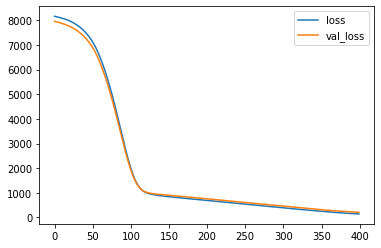

In [370]:
losses = pd.DataFrame(model2.history.history)
losses.plot()

In [254]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model2.predict(X_test)
print("Mean squared error :",np.sqrt(mean_squared_error(y_test,predictions)))


Mean squared error : 10.491390439796422


##Task 03

In [372]:
task3_dt=pd.read_csv('/content/daily-minimum-temperatures-in-me.csv',)

task3_dt.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [373]:
task3_dt.dtypes

Date                          object
Daily minimum temperatures    object
dtype: object

In [374]:
task3_dt.isnull().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [375]:
task3_dt['Daily minimum temperatures']=pd.to_numeric(task3_dt['Daily minimum temperatures'], errors='coerce')

In [376]:
task3_dt.isnull().sum()

Date                          0
Daily minimum temperatures    3
dtype: int64

In [377]:
task3_dt.dropna(inplace=True)

**Since Four prediction value (4 output neurons) so 4 targets per sample.**
**Creating a function to convert the data such that required number of previous records are used as the features for next 4 records as target.**

In [378]:
def new_feature2_dataset(ip_data, prev_data_count=2,op_count=1):
    new_data=[]
    n=ip_data.shape[0]
    i_range = n - (prev_data_count+op_count) - 1
    
    for i in range(0, i_range):
        new_data.append(ip_data[i:(i+prev_data_count+op_count)]) 
        #Add the records upto the previous count value as features and current record as target
    return np.array(new_data)

**Here, considering 8 previous records as appropriate no of features for prediction of next 4 current record as target.**

In [379]:
prev_data_count=8
op_count=4

new_task3_data = new_feature2_dataset(task3_dt['Daily minimum temperatures'],prev_data_count,op_count)

In [380]:
col_names=['feature_'+str(i+1) for i in range(0,prev_data_count)]
for i in range(0,op_count):
  col_names.append('Target_'+str(i+1))
print(col_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'Target_1', 'Target_2', 'Target_3', 'Target_4']


In [381]:

new_task3_data=pd.DataFrame(new_task3_data,columns=col_names)
new_task3_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,Target_1,Target_2,Target_3,Target_4
0,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3
1,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7
2,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5
3,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0
4,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7


In [382]:
new_task3_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,Target_1,Target_2,Target_3,Target_4
count,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000
mean,11.177793,11.176142,11.175454,11.173886,11.173500,11.172977,11.171381,11.170583,11.169813,11.167666,11.165905,11.165162
std,4.065405,4.062754,4.061827,4.059982,4.059723,4.059250,4.058570,4.057945,4.057027,4.053464,4.051015,4.050339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000,8.300000
50%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,14.000000,14.000000,14.000000,14.000000,14.000000,13.975000,13.900000,13.900000,13.900000,13.900000,13.900000,13.900000
max,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000,26.300000


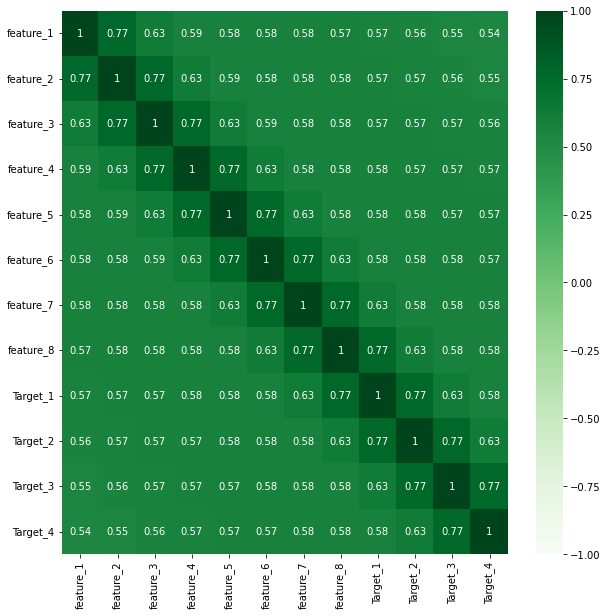

In [383]:
plt.figure(figsize=(10,10))
sns.heatmap(data=new_task3_data.corr(), vmin=-1, vmax=1,fmt='.2g',annot=True,cmap='Greens')
plt.show()

####Splitting the data in 70:30 ratio for training and testing of the model.

In [384]:
X = new_task3_data.drop(['Target_1', 'Target_2', 'Target_3', 'Target_4'],axis=1)
y = new_task3_data[['Target_1', 'Target_2', 'Target_3', 'Target_4']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [385]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
177,9.2,10.2,9.5,9.5,10.7,10.0,6.5,7.0
2598,11.8,13.6,16.2,14.1,13.5,15.0,14.8,16.2
1145,14.5,16.5,14.1,13.5,11.7,15.1,11.2,13.5
1776,9.6,12.0,12.2,11.3,13.2,10.5,10.1,8.8
553,5.3,2.4,2.8,4.0,7.5,7.8,5.6,3.3


In [386]:
y_train.head()

,Target_1,Target_2,Target_3,Target_4
177,7.4,8.1,6.6,8.3
2598,16.2,13.3,15.3,18.4
1145,12.6,8.8,10.5,12.1
1776,13.7,16.2,16.0,14.0
553,5.0,3.7,3.9,5.2


In [387]:
y_train.shape

(2543, 4)

####Normalizing data

In [388]:

X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()


####Model Building training and Evaluation

In [389]:
tf.random.set_seed(4)
model3 = Sequential()
model3.add(Dense(8,activation='relu',input_dim=8))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(4,activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
model3.compile(optimizer='adam', loss='mse')

In [390]:
model3.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_140 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_141 (Dense)            (None, 4)                 132       
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________


In [391]:

model3.fit(x=X_train,y=y_train,
          validation_split=0.1,
          epochs=100)

Epoch 1/100
72/72 [==============================] - 1s 4ms/step - loss: 131.1975 - val_loss: 118.0117
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 91.4028 - val_loss: 56.3519
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 32.9257 - val_loss: 25.8656
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 22.3247 - val_loss: 21.1633
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 18.4122 - val_loss: 17.2438
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 15.0811 - val_loss: 14.3399
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 12.7902 - val_loss: 12.3844
Epoch 8/100
72/72 [==============================] - 0s 2ms/step - loss: 11.2834 - val_loss: 11.1870
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: 10.3290 - val_loss: 10.3457
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: 9.7217 - val_lo

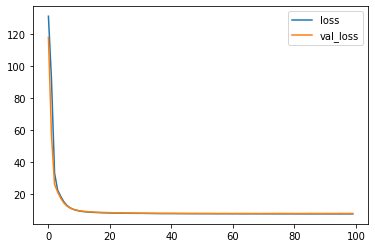

In [392]:
losses = pd.DataFrame(model3.history.history)
losses.plot()

In [393]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model3.predict(X_test)
print("Mean squared error :",np.sqrt(mean_squared_error(y_test,predictions)))


Mean squared error : 2.8269651526503297


##Task 04

In [280]:
task4_dt=pd.read_csv('/content/monthly-beer-production-in-austr.csv',)

task4_dt.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [281]:
task4_dt.dtypes

Month                       object
Monthly beer production    float64
dtype: object

In [285]:
prev_data_count=4

new_task4_data = new_feature2_dataset(task4_dt['Monthly beer production'],prev_data_count,3)

In [289]:
col_names=['feature_'+str(i+1) for i in range(0,prev_data_count)]
for i in range(0,3):
  col_names.append('Target_'+str(i+1))

print(col_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'Target_1', 'Target_2', 'Target_3']


In [290]:
new_task4_data=pd.DataFrame(new_task4_data,columns=col_names)
new_task4_data.head()

,feature_1,feature_2,feature_3,feature_4,Target_1,Target_2,Target_3
0,93.2,96.0,95.2,77.1,70.9,64.8,70.1
1,96.0,95.2,77.1,70.9,64.8,70.1,77.3
2,95.2,77.1,70.9,64.8,70.1,77.3,79.5
3,77.1,70.9,64.8,70.1,77.3,79.5,100.6
4,70.9,64.8,70.1,77.3,79.5,100.6,100.7


In [291]:
new_task4_data.describe()

,feature_1,feature_2,feature_3,feature_4,Target_1,Target_2,Target_3
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,136.363675,136.459402,136.544872,136.666239,136.772863,136.944017,137.083333
std,33.989725,33.930936,33.879142,33.832419,33.722746,33.590712,33.425658
min,64.800000,64.800000,64.800000,64.800000,64.800000,64.800000,67.500000
25%,111.850000,112.575000,112.900000,113.000000,113.375000,113.725000,113.800000
50%,139.450000,139.450000,139.450000,139.600000,139.600000,139.800000,139.800000
75%,159.325000,159.325000,159.325000,159.325000,159.325000,159.325000,159.325000
max,217.800000,217.800000,217.800000,217.800000,217.800000,217.800000,217.800000


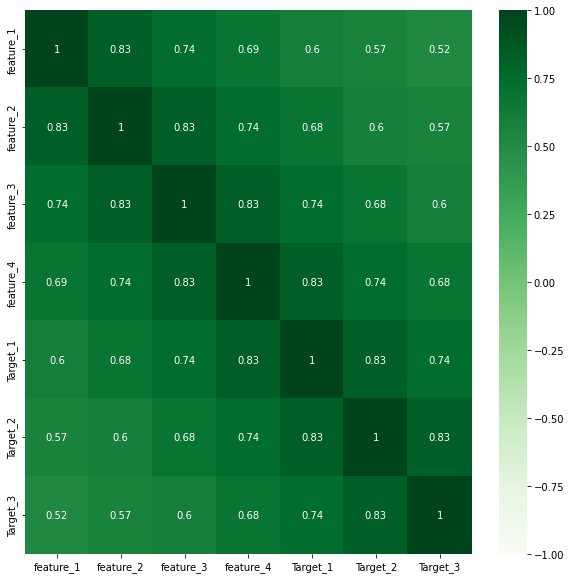

In [292]:
plt.figure(figsize=(10,10))
sns.heatmap(data=new_task4_data.corr(), vmin=-1, vmax=1,fmt='.2g',annot=True,cmap='Greens')
plt.show()

In [296]:
X = new_task4_data.drop(['Target_1', 'Target_2', 'Target_3'],axis=1)
y = new_task4_data[['Target_1', 'Target_2', 'Target_3']]


####Splitting the data in 80:20 ratio for training and testing of the model.

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [298]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4
117,116.2,135.9,134.0,104.6
170,135.7,130.0,109.4,117.8
7,77.3,79.5,100.6,100.7
327,132.5,137.3,135.5,121.7
429,190.0,192.0,192.0,147.0


In [299]:
y_train.head()

,Target_1,Target_2,Target_3
117,107.1,123.5,98.8
170,120.3,121.0,132.3
7,107.1,95.9,82.8
327,166.1,146.8,162.8
429,133.0,163.0,150.0


####Normalizing data

In [301]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()


####Model Building training and Evaluation

In [307]:
tf.random.set_seed(4)
model4 = Sequential()
model4.add(Dense(8,activation='relu',input_dim=4))
model4.add(Dense(16,activation='relu'))
model4.add(Dense(3,activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
model4.compile(optimizer='adam', loss='mse')

In [308]:
model4.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_120 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_121 (Dense)            (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [309]:

model4.fit(x=X_train,y=y_train,
          validation_split=0.1,
          epochs=400)

Epoch 1/400
11/11 [==============================] - 1s 16ms/step - loss: 19996.4707 - val_loss: 18076.9668
Epoch 2/400
11/11 [==============================] - 0s 3ms/step - loss: 19976.4160 - val_loss: 18057.9453
Epoch 3/400
11/11 [==============================] - 0s 3ms/step - loss: 19957.2734 - val_loss: 18037.9062
Epoch 4/400
11/11 [==============================] - 0s 4ms/step - loss: 19936.2031 - val_loss: 18014.5234
Epoch 5/400
11/11 [==============================] - 0s 3ms/step - loss: 19911.1035 - val_loss: 17986.2129
Epoch 6/400
11/11 [==============================] - 0s 3ms/step - loss: 19879.9727 - val_loss: 17950.6738
Epoch 7/400
11/11 [==============================] - 0s 4ms/step - loss: 19841.2852 - val_loss: 17906.5645
Epoch 8/400
11/11 [==============================] - 0s 5ms/step - loss: 19793.3652 - val_loss: 17850.5879
Epoch 9/400
11/11 [==============================] - 0s 4ms/step - loss: 19732.9180 - val_loss: 17780.2168
Epoch 10/400
11/11 [================

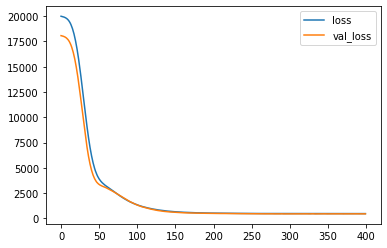

In [310]:
losses = pd.DataFrame(model4.history.history)
losses.plot()

In [311]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model4.predict(X_test)
print("Mean squared error :",np.sqrt(mean_squared_error(y_test,predictions)))


Mean squared error : 21.867719783635234


##Task 05

In [312]:
task5_dt=pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv',)

task5_dt.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [313]:
task5_dt.shape

(36, 2)

In [314]:
task5_dt.dtypes

Month                                         object
Sales of shampoo over a three year period    float64
dtype: object

**Since ONE prediction value (1 output neuron) so 1 target per sample.**
**Creating a function to convert the data such that required number of previous records are used as the features for single current record as target.**

In [315]:
def new_feature_dataset(ip_data, prev_data_count=2):
    new_data=[]
    n=ip_data.shape[0]
    i_range = n - prev_data_count - 1
    
    for i in range(0, i_range):
        new_data.append(ip_data[i:(i+prev_data_count+1)]) 
        #Add the records upto the previous count value as features and current record as target
    return np.array(new_data)

**Here, considering 4 previous records as appropriate no of features for prediction of single current record as target.**

In [316]:
prev_data_count=4
#no of previous occuring recors to be used as features 
new_task5_data = new_feature_dataset(task5_dt['Sales of shampoo over a three year period'],prev_data_count)

In [317]:
col_names=['feature_'+str(i+1) for i in range(0,prev_data_count)]
col_names.append('Target')
print(col_names)

['feature_1', 'feature_2', 'feature_3', 'feature_4', 'Target']


In [318]:
new_task5_data=pd.DataFrame(new_task5_data,columns=col_names)
new_task5_data.head()

,feature_1,feature_2,feature_3,feature_4,Target
0,266.0,145.9,183.1,119.3,180.3
1,145.9,183.1,119.3,180.3,168.5
2,183.1,119.3,180.3,168.5,231.8
3,119.3,180.3,168.5,231.8,224.5
4,180.3,168.5,231.8,224.5,192.8


In [319]:
new_task5_data.describe()

,feature_1,feature_2,feature_3,feature_4,Target
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,272.919355,277.487097,294.780645,304.206452,319.109677
std,111.304353,113.886490,132.432175,134.599267,138.950114
min,119.300000,119.300000,119.300000,119.300000,122.900000
25%,188.650000,188.650000,192.100000,193.550000,202.200000
50%,264.500000,264.500000,273.300000,287.000000,289.900000
75%,338.100000,341.000000,371.800000,404.450000,414.600000
max,575.500000,575.500000,682.000000,682.000000,682.000000


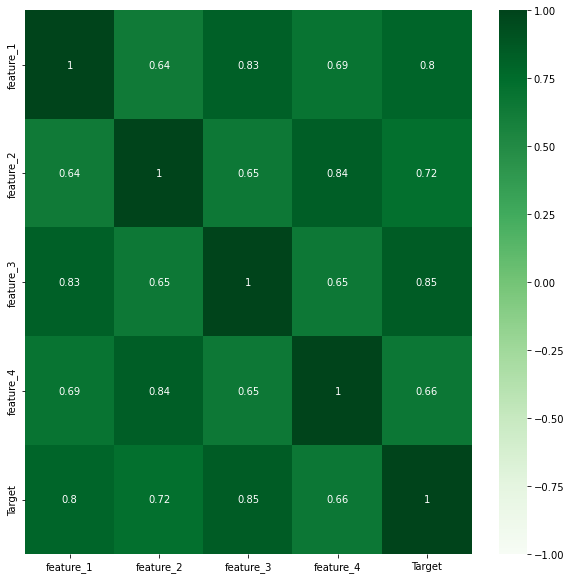

In [320]:
plt.figure(figsize=(10,10))
sns.heatmap(data=new_task5_data.corr(), vmin=-1, vmax=1,fmt='.2g',annot=True,cmap='Greens')
plt.show()

In [321]:
X = new_task5_data.drop('Target',axis=1)
y = new_task5_data['Target']


####Splitting the data in 90:10 ratio for training and testing of the model.

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [323]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4
12,194.3,149.5,210.1,273.3
9,122.9,336.5,185.9,194.3
1,145.9,183.1,119.3,180.3
20,289.9,421.6,264.5,342.3
28,401.3,437.4,575.5,407.6


In [324]:
y_train.head()

12    191.4
9     149.5
1     168.5
20    339.7
28    682.0
Name: Target, dtype: float64

####Normalizing data

In [325]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()


####Model Building training and Evaluation

In [326]:
tf.random.set_seed(4)
model5 = Sequential()
model5.add(Dense(8,activation='relu',input_dim=4))
model5.add(Dense(8,activation='relu'))
model5.add(Dense(4,activation='relu'))
model5.add(Dense(1,activation='linear'))
opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
model5.compile(optimizer='adam', loss='mse',)

In [327]:
model5.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_123 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_124 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [328]:
model5.fit(x=X_train,y=y_train.values,
          validation_split=0.2,
          epochs=800)

Epoch 1/800
1/1 [==============================] - 0s 493ms/step - loss: 114436.1641 - val_loss: 120827.4766
Epoch 2/800
1/1 [==============================] - 0s 26ms/step - loss: 114430.7344 - val_loss: 120820.8828
Epoch 3/800
1/1 [==============================] - 0s 21ms/step - loss: 114425.3594 - val_loss: 120814.3984
Epoch 4/800
1/1 [==============================] - 0s 19ms/step - loss: 114420.1094 - val_loss: 120808.3359
Epoch 5/800
1/1 [==============================] - 0s 22ms/step - loss: 114414.8359 - val_loss: 120802.2734
Epoch 6/800
1/1 [==============================] - 0s 22ms/step - loss: 114409.5156 - val_loss: 120796.2266
Epoch 7/800
1/1 [==============================] - 0s 22ms/step - loss: 114404.2891 - val_loss: 120790.2188
Epoch 8/800
1/1 [==============================] - 0s 22ms/step - loss: 114399.0469 - val_loss: 120784.1484
Epoch 9/800
1/1 [==============================] - 0s 23ms/step - loss: 114393.6406 - val_loss: 120778.0391
Epoch 10/800
1/1 [=========

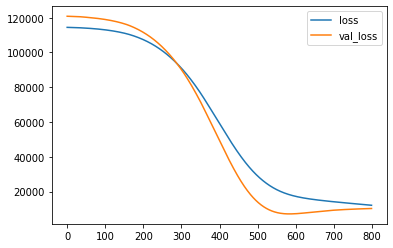

In [329]:
losses = pd.DataFrame(model5.history.history)
losses.plot()

In [330]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model5.predict(X_test)
print("Mean squared error :",np.sqrt(mean_squared_error(y_test,predictions)))


Mean squared error : 124.77521607268362
